In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
import seaborn as sns
sns.set()

### III. Machine Learning Classification
Now that we have a sense of what our data loooks like, we're ready to build our classifier. We'll do this in three steps:

* 1. **Data Cleanup**: We'll take a few extra steps to clean up our data and prepare it for our classifiers
* 2. **Training**: We'll train several machine learning models on our input data
* 3. **Evaluation/Analysis**: We'll look at the results of our classifiers and analyze them

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
def prepare_dataset(df):
    """
    Separates the dataset into X and y
    """
    X = df.loc[:, df.columns != 'Outcome']
    y = df.Outcome
    return X, y

In [6]:
X, y = prepare_dataset(df)

## Data Cleanup
No dataset is perfect. When you look at some of our features, you might notice that not everything makes sense. For example, if you look at the minimum of some of these columns, you notice that some patients have a BMI and blood pressure of 0. Does that sound right?

Chances are these are **missing values**: those patients don't really have a BMI of 0, but maybe the researchers didn't collect those patient's BMI and so just put 0 in as a subsitute. 
You might also see these as "NaN", meaning "not a number", but in this case they were assigned a value of 0.

## Questions to discuss
- Why might these values be missing?
- Does every column with a "0" mean that that's a missing value?
- What are some potential problems of building a classifier with missing values?
- What should we do about them?

In [7]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


There are multiple ways to handle missing values. To keep things simple, we'll simply replace those "0" values with the average of that column, which is a rough estimate of what we might expect that patient to have. This is called [data imputation](https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/).


Not every column has missing values - for example, 0 pregnancies makes sense, and the minimum age is 21. We'll only impute the values in the columns for which a value of "0" doesn't make sense.

In [8]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
X[columns_to_fill] = X[columns_to_fill].replace(0, X[columns_to_fill].mean())

/Users/alec/anaconda/envs/uvu/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


The next step we'll take is **scaling** the data. Each of the columns of our table has very different ranges. Some algorithms expect each variable to be scaled within a normal range. 

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler
https://en.wikipedia.org/wiki/Feature_scaling

In [10]:
columns = X.columns

In [11]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(data=X, columns=columns)

In [12]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-1.595946e-16,1.156482e-17,2.868076e-16,-4.394633e-17,6.800116e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.553955e+00,-3.985352e+00,-2.037044e+00,-1.125139e+00,-2.074083e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.210503e-01,-6.817623e-01,-6.306536e-01,-4.177681e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.539182e-01,-2.104440e-02,-3.747004e-01,-4.177681e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.104773e-01,6.396735e-01,5.603676e-01,9.234424e-02,6.038797e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542014e+00,4.108443e+00,7.521430e+00,7.819199e+00,5.042893e+00,5.883565e+00,4.063716e+00


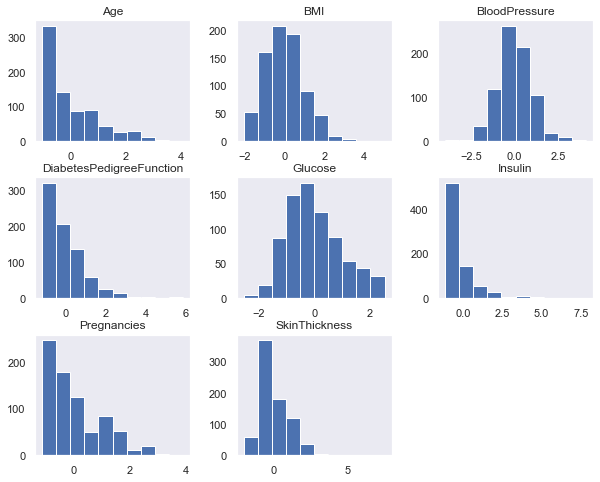

In [29]:
_ = X.hist(figsize=(10,8), grid=False)

## Training
We're now finally ready to train our models! 

#### Test-Train Split
We'll also split up our dataset into a *train* and *test* set. Our ultimate goal is to be able to predict whether a set of brand-new patients has diabetes. These new patients have never been seen before by our classifier. 

A common practice in machine learning development is to take a portion of our data and leave those rows out during training, then we'll see how our classifiers perform on these rows.

https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets

## Questions to discuss
- Why is it important  to evaluate on testing data that is separate from our training data?
- How should you select the data that you'll leave out for testing?
- What are the costs of taking out data for testing? ie., making a **blind testset**
- What proportions should be used for testing and training? Is there a guiding principle? 

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
# Split up data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [16]:
X_train.shape

(614, 8)

In [17]:
X_test.shape

(154, 8)

#### Choosing an algorithm
There are many different types of algorithms that can be used for machine learning classification. Each one works a little differently and some work better for a specific problem. To find the best one, we'll pick a few different models and train each of them, then analyze and compare the results.

https://en.wikipedia.org/wiki/Outline_of_machine_learning#Types_of_machine_learning_algorithms
We won't go into the details about each classifier, but we'll try out each of these 6 classifiers. Feel free to look them up and see how each performs.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
models = {"LR": LogisticRegression(),
          "NB": GaussianNB(),
          "KNN": KNeighborsClassifier(),
          "DT": DecisionTreeClassifier(),
          "RFC": RandomForestClassifier(),
          "SVM": SVC()
         }


In [20]:
model_scores = []
model_names_scores = []
for name, model in models.items():
    # Train the model
    print("Training {}".format(name))
    model.fit(X_train, y_train)
    
    # Predict on the test set
    pred = model.predict(X_test)
    # Measure the accuracy
    accuracy  = accuracy_score(y_test, pred)
    print("Accuracy: {}".format(accuracy))
    print()
    
    # Append to this list to analyze later
    model_names_scores.append((name, accuracy))

Training LR
Accuracy: 0.7337662337662337

Training NB
Accuracy: 0.7402597402597403

Training KNN
Accuracy: 0.7142857142857143

Training DT
Accuracy: 0.7142857142857143

Training RFC
Accuracy: 0.6948051948051948

Training SVM
Accuracy: 0.7142857142857143



/Users/alec/anaconda/envs/uvu/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alec/anaconda/envs/uvu/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alec/anaconda/envs/uvu/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Evaluation and Analysis
Let's see how our classifiers did on our test set. Let's start by sorting the scores by accuracy and plotting their performance.

In [21]:
sorted_name_scores = sorted(model_names_scores, key=lambda x:x[1], reverse=True)
sorted_names, sorted_scores = zip(*sorted_name_scores)

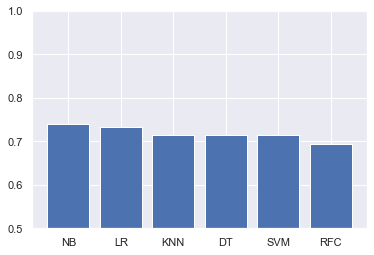

In [30]:
x_plot = range(len(sorted_names))
fig, ax = plt.subplots()

ax.bar(x_plot, sorted_scores)
ax.set_ylim(0.5, 1.0)

ax.set_xticks(x_plot)
_ = ax.set_xticklabels(sorted_names)

## Closer analysis
Now, let's take the best-performing model and look at more details. While training, we only looked at the **accuracy** of the classifier. But an accuracy score is sometimes insufficient. **Question**: Can you think of some reasons why?

To supplement this, we'll look at three more metrics: **precision**, **recall**, and **f1-score**. Here is a blog post that explains the difference between these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In summary, here's what each metric tells us:
- **Precision**: If our classifier says a patient has diabetes, how likely is it that our classifier is correct?
- **Recall**: If our classifier is given a patient with diabetes, how likely is it that our classifier will correctly predict that?
- **F1**: This is a balanced average of the two

#### Now, analyze your results
Look at the graph and take name of the highest-performing classifier (the first label on the x-axis). Replace the value of `best_clf_name` in the cell below. We'll then look at more detailed metrics for this model.

In [23]:
# Look at the best score
best_clf_name = sorted_names[0]
best_clf = models[best_clf_name]
print('Best Model: {0}'.format(best_clf))

Best Model: GaussianNB(priors=None, var_smoothing=1e-09)


In [24]:
best_clf.fit(X_train, y_train) # Retrain
pred = best_clf.predict(X_test) 

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        99
           1       0.65      0.58      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



## Questions to discuss
- Compare your results to the results of others in your group. Did you get the same results, or are they different?
- What kind of factors can cause you to get different results from someone else?
- If you want, run this part of the notebook, starting at the cell that says "Split up Data". Try changing the parameter `test_size` (currently 0.2). Does doing this change your results?

## Confusion Matrix
Let's now plot a **confusion matrix** to see what kinds of mistakes our classifier is making. A confusion matrix plots the **truth** on the y axis (whether a patient had diabetes or didn't) against the **predictions** on the x axis (whether or not our classifier predicted diabetes).

In [26]:
conf = confusion_matrix(y_test,pred)

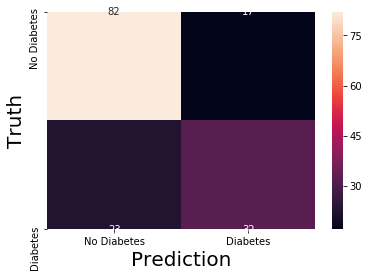

In [27]:
label = ["No Diabetes","Diabetes"]
ax = sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Truth', fontdict={'size': 20})
_ = ax.set_xlabel('Prediction', fontdict={'size': 20})

## Questions to discuss
- What does the confusion matrix below tell us? What is our classifier doing a good job at doing? What does it not do as well at?
- What type of error is the worst? Does this depend on the situation that you're using the classifier for?
- What do we do about these errors? Compare that to a rule-based classifier

# What Next?
This was a quick overview of the machine learning process. Here are some additional steps you could take to improve your classifier:
- **Model tuning**: We tested a few different classifiers, but we could make a lot of changes to each classifier. Machine learning models have *hyperparameters* which are values that can be tweaked to optimize the performance of the classifier
- **Additional data transformations**: We replaced missing values and scaled the data. We could do additional work to clean up and transform the data
- **Try a larger dataset**: This dataset has only 784 patients. Machine learning benefits from having **lots of data** so that it can see lots of examples of patients to learn patterns from. This is a relatively small dataset. If there are larger, similar datasets that fit our needs, you may want to try and see if using a larger training set improves your performance
- **Cross-Validate**: We split our data into a *training set* and a *testing set*. What was the reason for this? What are some disadvantages of doing this? Cross-validation is another way of splitting up our data in a way that lets you train and test on every patient rather than leaving 20% out of the training process.
